In [ ]:
# 최초 실행 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 1. 단어 빈도 분석

In [ ]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 450kB 26.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


https://raw.githubusercontent.com/bjpublic/tmwithpython/master/%ED%8A%B8%EB%9F%BC%ED%94%84%EC%B7%A8%EC%9E%84%EC%97%B0%EC%84%A4%EB%AC%B8.txt

In [ ]:
f = open("/content/drive/MyDrive/2021 인재양성 해커톤 프로그램/트럼프취임연설문.txt", 'r')
lines = f.readlines()[0]
f.close()

lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [ ]:
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

words = lines.lower()

tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
every        7
nation       7
great        6
never        6
new          6
dtype: int64

구글 마운트

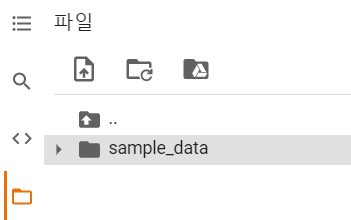

In [ ]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

f = open("/content/drive/MyDrive/2021 인재양성 해커톤 프로그램/문재인대통령취임연설문.txt", 'r')
lines = f.readlines()
f.close()

In [ ]:
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))

In [ ]:
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [ ]:
word_list=flatten(temp)
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
나라       6
국민들      6
역사       6
세상       5
대통령의     5
dtype: int64

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
font_path = '/content/drive/MyDrive/2021 인재양성 해커톤 프로그램/NanumGothic.ttf'

In [ ]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

In [ ]:
count = Counter(stopped_tokens2)

In [ ]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [ ]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()

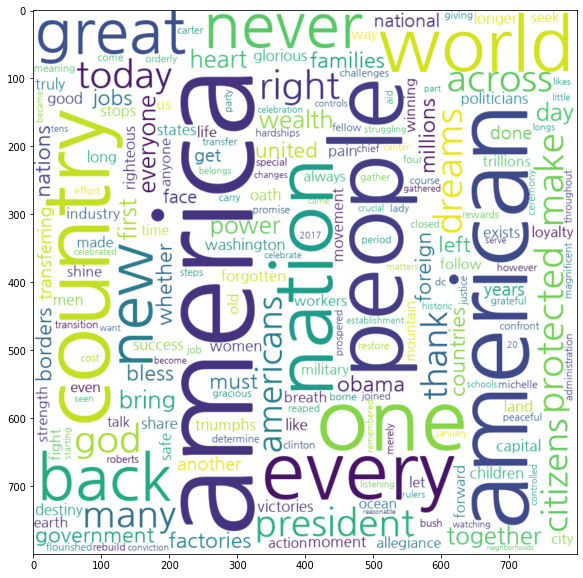

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('/content/drive/MyDrive/2021 인재양성 해커톤 프로그램/wordcloud_1.png')

In [ ]:
count = Counter(word_list)

In [ ]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [ ]:
array = wordcloud.to_array()

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

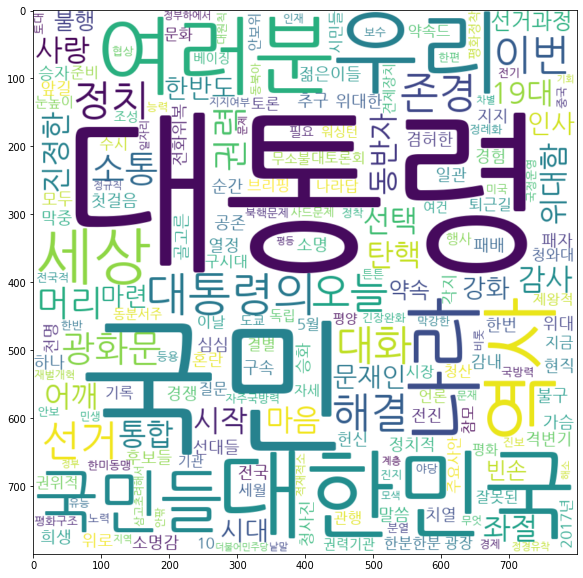

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('/content/drive/MyDrive/2021 인재양성 해커톤 프로그램/wordcloud_2.png')

https://colab.research.google.com/drive/0B2FHtWH7me5LcC12ZnZLYzE3Z2M?resourcekey=0-2hydzGjj3GpNFCtq0mmg9A#scrollTo=IAFWVeYLgB27

#2. 군집분석

In [ ]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

hannanum = Hannanum()
Data = pd.read_csv('/content/drive/MyDrive/2021 인재양성 해커톤 프로그램/군집분석데이터.csv', engine="python")
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   검색어     14 non-null     object
 1   기사내용    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [ ]:
docs = []
for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

kmeans = KMeans(n_clusters=3).fit(df)

kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2], dtype=int32)

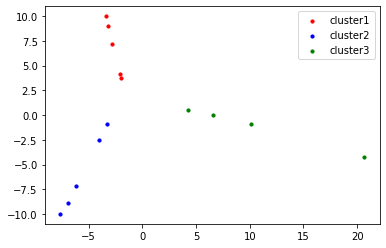

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pricipal component 1', 'principal component 2'])
principalDf.index=Data['검색어']

plt.scatter(principalDf.iloc[kmeans.labels_ == 0,0], principalDf.iloc[kmeans.labels_ == 0,1], s=10, c='red', label='cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1,0], principalDf.iloc[kmeans.labels_ == 1,1], s=10, c='blue', label='cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2,0], principalDf.iloc[kmeans.labels_ == 2,1], s=10, c='green', label='cluster3')

plt.legend()

In [ ]:
pip install pyclustering

     |████████████████████████████████| 2.6MB 28.1MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395121 sha256=c2bb211c96c524b35c5526210fc6c121b2087d947975302b30a9078fbf6853e7
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [ ]:
import pyclustering
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

hannanum = Hannanum()
    
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

# kmedoids_instance = kmedoids.kmedoids(df.as_matrix(), initial_index_medoids=np.random.randint(15, size=3))
# kmedoids_instance.process()
# clusters = kmedoids_instance.get_cluster()

# clusters

In [ ]:
# 군집 분석 시각화
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0])

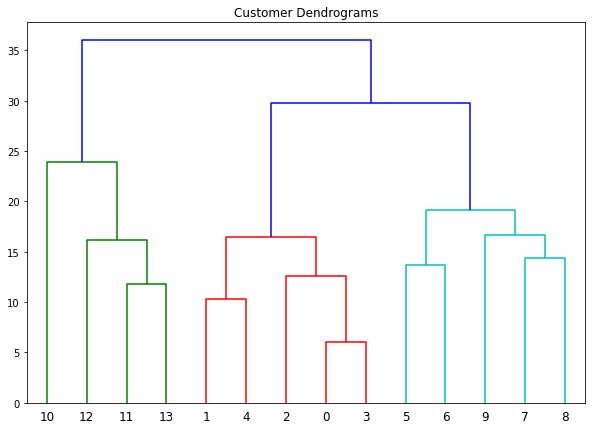

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

#3. 토픽 모델링


Perplexity:  -5.058342999939261

Coherence Score:  0.32094839813397286


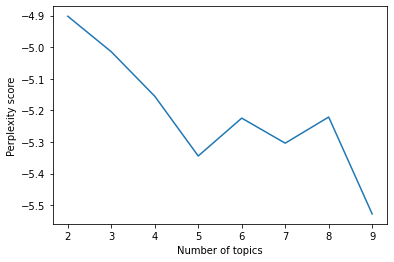

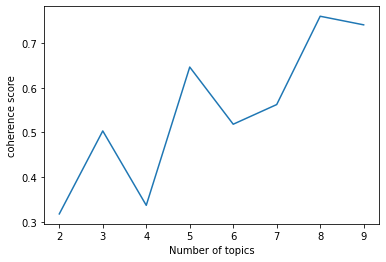

In [ ]:
# LDA
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

p_stemmer = PorterStemmer()

doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]

texts = []

for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary)
ldamodel.print_topics(num_words=5)
ldamodel.get_document_topics(corpus)[0]

In [ ]:
# LDA 토픽 개수 지정
from gensim.models import CoherenceModel

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# 예제_토픽의 개수를 달리하여 각 지표를 계산
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

coherence_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

#4. 감성분석

1. nltk : vader_lexicon

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
sid.polarity_scores("I love you")

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.192, 'pos': 0.808}

In [ ]:
sid.polarity_scores("I love you so much")

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.417, 'pos': 0.583}

###2. 지도학습

https://essim92.tistory.com/49

영어

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def 영어_말뭉치():
    test_sentence = input("문장을 입력해주세요: ")
    train = [(input("긍정문장: "), 'pos'),
             (input("긍정문장: "), 'pos'),
             (input("부정문장: "), 'neg'),
             (input("부정문장: "), 'neg')]
    all_words = set(word.lower() for sentence in train
                    for word in word_tokenize(sentence[0]))
    t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
    classifier = nltk.NaiveBayesClassifier.train(t)
    print(classifier.show_most_informative_features())
    test_sent_features = {word.lower(): 
                        (word in word_tokenize(test_sentence.lower()))
                           for word in all_words}
    print(test_sent_features)
    return classifier.classify(test_sent_features)

긍정문장: I like you

긍정문장: I love you

부정문장: I don't like you

부정문장: I don't love you

In [ ]:
영어_말뭉치()

문장을 입력해주세요: I like it
긍정문장: I like you
긍정문장: I love you
부정문장: I don't like you
부정문장: I don't love you
Most Informative Features
                    love = False             neg : pos    =      1.0 : 1.0
                    love = True              neg : pos    =      1.0 : 1.0
                    like = False             neg : pos    =      1.0 : 1.0
                    like = True              neg : pos    =      1.0 : 1.0
                       i = False             neg : pos    =      1.0 : 1.0
                     you = True              neg : pos    =      1.0 : 1.0
None
{'do': False, 'love': False, "n't": False, 'like': True, 'i': True, 'you': False}


'pos'

In [ ]:
영어_말뭉치()

문장을 입력해주세요: I don't like it
긍정문장: I like you
긍정문장: I love you
부정문장: I don't like you
부정문장: I don't love you
Most Informative Features
                    love = False             neg : pos    =      1.0 : 1.0
                    love = True              neg : pos    =      1.0 : 1.0
                    like = False             neg : pos    =      1.0 : 1.0
                    like = True              neg : pos    =      1.0 : 1.0
                       i = False             neg : pos    =      1.0 : 1.0
                     you = True              neg : pos    =      1.0 : 1.0
None
{'do': True, 'love': False, "n't": True, 'like': True, 'i': True, 'you': False}


'neg'

한국어

In [ ]:
#from konlpy.tag import Twitter
from konlpy.tag import Okt
pos_tagger = Okt()

In [ ]:
def 한글_말뭉치():
    test_sentence = input("문장을 입력해주세요: ")
    train = [(input("긍정문장: "), 'pos'),
             (input("긍정문장: "), 'pos'),
             (input("부정문장: "), 'neg'),
             (input("부정문장: "), 'neg')]
    all_words = set(word.lower() for sentence in train
                    for word in word_tokenize(sentence[0]))
    print(all_words)
    t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
    classifier = nltk.NaiveBayesClassifier.train(t) # 공부시킴
    print(classifier.show_most_informative_features())
    test_sent_features = {word:(word in word_tokenize(test_sentence)) for word in all_words}
    return classifier.classify(test_sent_features)

긍정문장: 고양이가 좋아

긍정문장: 강아지가 좋아

부정문장: 고양이가 싫어

부정문장: 강아지가 싫어

In [ ]:
한글_말뭉치()

문장을 입력해주세요: 메리가 좋아
긍정문장: 고양이가 좋아
긍정문장: 강아지가 좋아
부정문장: 고양이가 싫어
부정문장: 강아지가 싫어
{'고양이가', '좋아', '강아지가', '싫어'}
Most Informative Features
                    고양이가 = False             neg : pos    =      1.0 : 1.0
                    고양이가 = True              neg : pos    =      1.0 : 1.0
                    강아지가 = True              neg : pos    =      1.0 : 1.0
                    강아지가 = False             neg : pos    =      1.0 : 1.0
None


'pos'

In [ ]:
한글_말뭉치()

문장을 입력해주세요: 메리가 싫어
긍정문장: 고양이가 좋아
긍정문장: 강아지가 좋아
부정문장: 고양이가 싫어
부정문장: 강아지가 싫어
{'고양이가', '좋아', '강아지가', '싫어'}
Most Informative Features
                    고양이가 = False             neg : pos    =      1.0 : 1.0
                    고양이가 = True              neg : pos    =      1.0 : 1.0
                    강아지가 = True              neg : pos    =      1.0 : 1.0
                    강아지가 = False             neg : pos    =      1.0 : 1.0
None


'neg'

감성분석 참고
https://colab.research.google.com/drive/1AklbmwYyn7EtiJF3iXQmETWAnCMSc5IX?usp=sharing